# **Lab Task: Build K‑Nearest Neighbors (KNN) Classifier from Scratch**

## **Objective :**
- Implement the KNN classification algorithm in Python without using scikit‑learn’s KNeighborsClassifier.

- Practice data loading, cleaning, feature scaling, and train/test splitting.

- Evaluate your classifier’s performance using accuracy, precision, recall, and a confusion matrix.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time

## **1. Data loading**


In [3]:
df = pd.read_csv('data.csv', index_col='id').reset_index(drop=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## **2. Data Preprocessing**

- **Identify missing values**
- **Handle missing data (choose one)**
- **Feature scaling**
- **Train/Test split**: Split into 70% train / 30% test (use random_state=42).

In [4]:
# Step 1: Load the data
df = pd.read_csv('data.csv', index_col='id')
df.reset_index(drop=True, inplace=True)

# Step 2: Drop any irrelevant columns (like 'Unnamed: 32' if it exists)
if 'Unnamed: 32' in df.columns:
    df.drop(columns=['Unnamed: 32'], inplace=True)

# Step 3: Check for missing values
print(df.isnull().sum().sum())  # Total missing values

# Step 4: Encode diagnosis
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Step 5: Feature scaling (Min-Max Scaling)
from sklearn.preprocessing import MinMaxScaler

features = df.drop('diagnosis', axis=1)
target = df['diagnosis']
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, target, test_size=0.3, random_state=42
)


0


## **Implement KNN Class**

In [5]:
from collections import Counter

class kNN():
    '''k-Nearest Neighbours'''
    
    def __init__(self, k=3, metric='euclidean', p=2):
        self.k = k
        self.metric = metric
        self.p = p

    def euclidean(self, v1, v2):
        return np.sqrt(np.sum((v1 - v2) ** 2))

    def manhattan(self, v1, v2):
        return np.sum(np.abs(v1 - v2))

    def minkowski(self, v1, v2, p):
        return np.sum(np.abs(v1 - v2) ** p) ** (1 / p)

    def compute_distance(self, v1, v2):
        if self.metric == 'euclidean':
            return self.euclidean(v1, v2)
        elif self.metric == 'manhattan':
            return self.manhattan(v1, v2)
        elif self.metric == 'minkowski':
            return self.minkowski(v1, v2, self.p)
        else:
            raise ValueError("Unsupported metric")

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for row in X_test:
            # picking testing row and then finding its neighbours by calculating
            #  distance see get_neighbours after calcualting distance we are sorting the distance and then taking top k
            neighbours = self.get_neighbours(row)
            #top_labels = [label for _, label in neighbours]
            top_labels = []
            for distance, label in neighbours:
                top_labels.append(label)
            prediction = Counter(top_labels).most_common(1)[0][0]  # most common label ---> Counter(top_labels) groups i.e yes=3,no=1 
            # and then we are taking the most common label i.e .most_common(1) gives yes=3 and selecting the first one in case of tie
            # we are taking the first one
            
            predictions.append(prediction)
        return np.array(predictions)

    def get_neighbours(self, test_row):
        distances = []
        for i in range(len(self.X_train)):
            dist = self.compute_distance(test_row, self.X_train[i])
            distances.append((dist, self.y_train[i]))

        # Sort by distance
        distances.sort(key=lambda x: x[0])

        # Return top k
        return distances[:self.k]
    
    

## **Evaluate the model**


Find the following performance matrices results:
- Accuracy (overall correct rate)

- Precision (true positives ÷ predicted positives)

- Recall (true positives ÷ actual positives)

- Confusion Matrix

- Classfication Report

In [6]:
knn = kNN(k=3)  
knn.fit(X_train, y_train.values)
y_pred = knn.predict(X_test)

print("Predictions:", y_pred)
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Predictions: [0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1
 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
Accuracy: 0.9707602339181286
Precision: 0.967741935483871
Recall: 0.9523809523809523
Confusion Matrix:
 [[106   2]
 [  3  60]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98       108
           1       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



## **Effect of k on Classification Accuracy**

- For each k from 3 to 29, fit your k‑NN on the training set and record test accuracy.

- Plot k (on the x‑axis) vs. accuracy (on the y‑axis), with markers and clear labels.

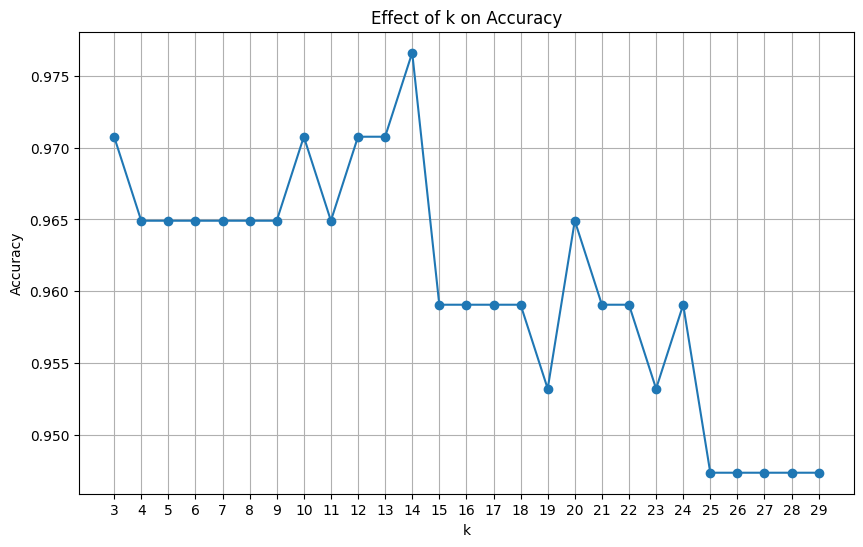

In [7]:
accuracies = []
k_values = list(range(3, 30))

for k in k_values:
    knn = kNN(k=k)
    knn.fit(X_train, y_train.values)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plotting
plt.figure(figsize=(10,6))
plt.plot(k_values, accuracies, marker='o')
plt.title('Effect of k on Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(k_values)
plt.show()
